# Decaimiento Radiactivo
### Integrantes
#### Héctor Andrés Flores 
#### Alejandra Yuriko Yamamoto

In [1]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
using Interact

Teoría
Problema Físico
De MonteCarlo justificar cómo se obtiene la ecuación diferencial que describe el decaimiento radiactivo.

El problema que queremos resolver es simular cómo decae un número pequeño N de partículas radioactivas. Escencialmente, queremos determinar cuándo dicho decaimiento se comporta de manera exponencial y cuándo estocásticamente, es decir, contiene elementos de azar.

El decaimiento radiactivo es un proceso natural en el cual una partícula, sin estimulación externa alguna, decae, convirtiéndose en otra partícula. Aún cuando la probabilidad de decaimiento en un intervalo de tiempo es contstante, justo cuando ésta decae es un evento aleatorio. De hecho, puesto que el momento exacto cuando una partícula decae es aleatorio, no importa qué tanto tiempo ha estado "viva" la partícula o si otras partícula ya han decaído. En otras palabras, la probabilidad de cualquier partícula que decae por intervalo unitario de tiempo es constante y una vez que decae, se pierde para siempre. Por supuesto, el número total de partículas disminuyen con el tiempo, así como el número de decaimientos, pero la probabilidad de cualquiera de estas partículas en decaer en un cierto intervalo de tiempo es siempre la misma constante simpre y cuando dicha partícula exista.

Your problem is to simulate how a small number N of radioactive particles decay.3
In particular, you are to determine when radioactive decay looks like exponential
decay and when it looks stochastic (containing elements of chance).

Spontaneous decay is a natural process in which a particle, with no external
stimulation, decays into other particles. Even though the probability of decay of
any one particle in any time interval is constant, just when it decays is a random
event. Because the exact moment when any one particle decays is random, it does
not matter how long the particle has been around or whether some other particles
have decayed. In other words, the probability P of any one particle decaying per
unit time interval is a constant, and when that particle decays, it is gone forever.
Of course, as the total number of particles decreases with time, so will the number
of decays, but the probability of any one particle decaying in some time interval is
always the same constant as long as that particle exists.


### Decaimiento Discreto

Imagine having a sample of N(t) radioactive nuclei at time t. Let ΔN be the number of particles that decay in some small time interval Δt. We
convert the statement “the probability P of any one particle decaying per unit time
is a constant” into the equation.

    $$\frac{N(t)}{t}$$

**[1]** Resolver la ecuación diferencial de decaimiento radiactivo mediante algún método visto en clase como Runge-Kutta
        $$ \frac{dN(t)}{dt} = - \lambda N(t) $$


#### Para una partícula

In [ ]:
# Queremos gráficas de escalones, 1 escalón para 1 partícula. N escalones que salen de 1 para N partículas. 
# Después gráficas para muuuchas N's y debería poderse ajustar una exponencial.
# Modificar para distintas p's 

In [ ]:
function generador_num_aleatorio(a, c, xn, n)
    Xn = [xn]
    for i in 1:n
        xn1 = a*Xn[i] + c
        #@show i, Xn[i], xn1
        push!(Xn, xn1)
    end
    return pop!(Xn)
end

In [ ]:
# Ahora convertimos los números aleatorios entre 0 y 1. Normalizamos
function normalizar(num)
    return num/typemax(UInt64)
end

In [ ]:
a = UInt64(6364136223846793005)
c = UInt64(1442695040888963407)
xn = UInt64(598);

In [ ]:
generador_num_aleatorio(a, c, xn, 1)

In [ ]:
normalizar(ans)

In [ ]:
typeof(ans)

In [ ]:
# Función que genere números aleatorios y los normalice

In [ ]:
xx= 2
contador = 1
if xx <1
    contador = contador
else
    contador += contador
end
return contador

In [ ]:
1/2

In [ ]:
typeof(ans)

In [ ]:
rr = rand()

In [ ]:
typeof(ans)

In [ ]:
UInt64(3.0)

In [ ]:
generador_num_aleatorio(a, c, xn, n)

In [ ]:
# Para una cierta probabilidad P prueba con mi función para generar números aleatorios
function Decaimiento1Nf(N, p::Float64)
    
    N = 1 # 1 partícula
    
    # Parámetros para la función 'generador_num_aleat'
    a = UInt64(6364136223846793005)
    c = UInt64(1442695040888963407)
    
    n = 1 
    
    t0 = 0 # Tiempo inicial
    #ΔN = 0 #
    ts = [t0]
    Ns = [N]
    
    while N > 0
        s = rand()
        xn = UInt64(s)
        aleat = generador_num_aleatorio(a, c, xn, n)
        num_aleat = normalizar(aleat)  # Genera un número aleatorio entre 0 y 1
        
        #@show num_aleat
        
        if num_aleat <= p
            N = N
        else
            N -= N
        end

        #@show N, t0, ts
        t0 += 1
        push!(ts, t0)
        push!(Ns, N)
            
    end

    return Ns, ts
end

In [ ]:
Decaimiento1N(1, 1/2)

In [ ]:
# Para una cierta probabilidad P usando la función rand para 1 partícula
function Decaimiento1N(N, p::Float64)
    
    N = 1 # 1 partícula
    
    t0 = 0 # Tiempo inicial
    #ΔN = 0 #
    ts = [t0] # Arreglo de tiempos
    Ns = [N] # Arreglo de valores de N en el tiempo
    
    while N > 0
        num_aleat = rand() # Genera un número aleatorio entre 0 y 1
        
        @show num_aleat
        
        if num_aleat > p
            N = N
        else
            N -= N
        end

        t0 += 1
        push!(ts, t0)
        push!(Ns, N)
            
    end

    return ts, Ns
end

In [ ]:
Decaimiento1N(1, 1/2)

In [ ]:
Decaimiento1N(1, 0.2)

In [48]:
# Para una cierta probabilidad P usando la función rand para N partículas
function DecaimientoN(N, p::Float64)
    
    #N = 1 # 1 partícula
    
    t0 = 0 # Tiempo inicial
    #ΔN = 0 #
    ts = [t0] # Arreglo de tiempos
    Ns = [N] # Arreglo de valores de N en el tiempo
    
    while N > 0
        num_aleat = rand() # Genera un número aleatorio entre 0 y 1
        
        #@show num_aleat
        
        if num_aleat > p
            N = N
            t0 += 1
            push!(ts, t0)
            push!(Ns, N)
        else
            N -= 1
            t0 = t0
            push!(ts, t0)
            push!(Ns, N)
            t0 += 1
        end

        
        
        #t0 += 1
            
    end

    return ts, Ns
end

DecaimientoN (generic function with 1 method)

In [ ]:
DecaimientoN(2, 1/2)

In [50]:
tiempos, N2 = DecaimientoN(2, 0.5)

([0,1,1,3,4,5,6,6],[2,2,1,1,1,1,1,0])


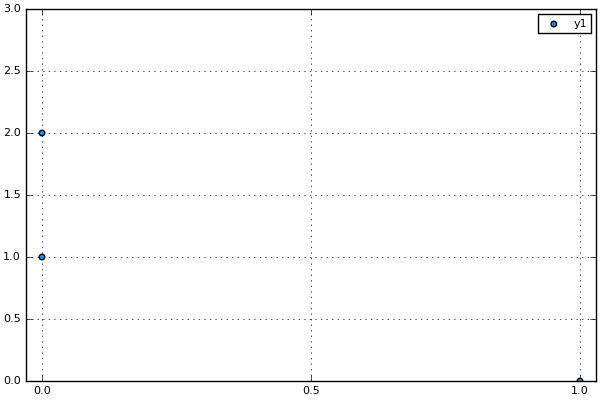

In [43]:
# Función que plotee
scatter(tiempos, N2, ylim = (0, 3))

In [ ]:
tiempos, N2 = DecaimientoN(1, 0.5)
tiempos, N2 = DecaimientoN(2, 0.5)
tiempos, N2 = DecaimientoN(3, 0.5)

Tiempos = []
N
for i in 1:10
    DecaimientoN(i, 1/2)
    

In [51]:
# Lista sí
function list_decaimiento(N)
    Decaimientos = []
    Tiempos = []
    for i in 1:N
        dec = DecaimientoN(i, 1/2)
        push!(Decaimientos, dec)
        #push!(Tiempos, tiempos)
        #@show i, dec, Decaimientos
    end
    return Decaimientos
end

list_decaimiento (generic function with 1 method)

In [30]:
Decay = list_decaimiento(2)

(i,dec,Decaimientos) = (1,([0,1,2],[1,1,0]),Any[([0,1,2],[1,1,0])])
(i,dec,Decaimientos) = (2,([0,1,2,3,4,5],[2,1,1,1,1,0]),Any[([0,1,2],[1,1,0]),([0,1,2,3,4,5],[2,1,1,1,1,0])])


2-element Array{Any,1}:
 ([0,1,2],[1,1,0])            
 ([0,1,2,3,4,5],[2,1,1,1,1,0])

In [31]:
Decay[1]

([0,1,2],[1,1,0])


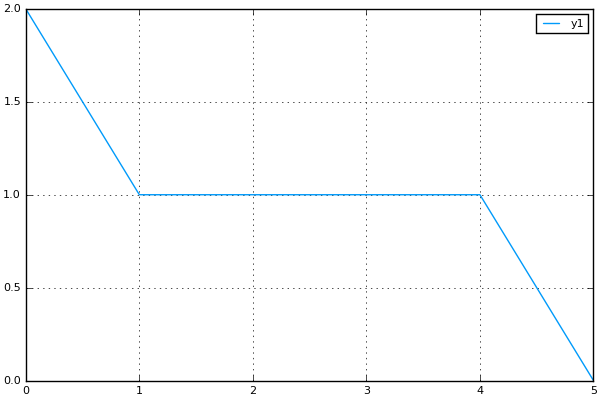

In [33]:
# Prueba
plot(Decay[2])


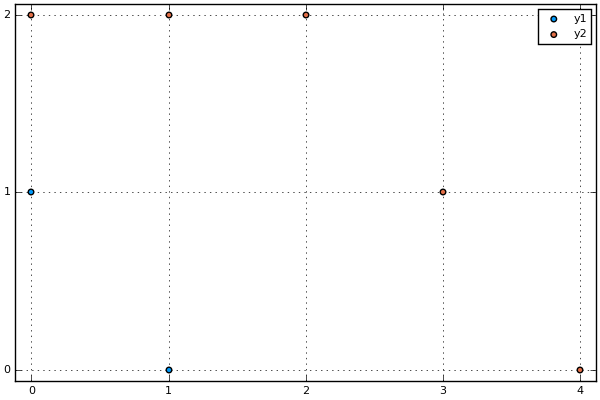

In [21]:
p = scatter(Decay[1])
for i in 2:length(Decay)
    p = scatter!(Decay[i])
    return p
end

In [52]:
Decay100 = list_decaimiento(100);


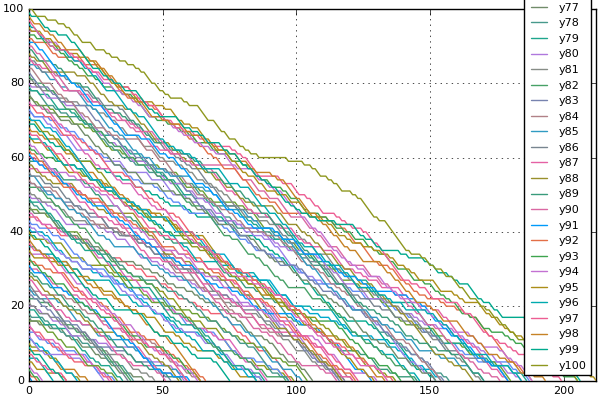

In [29]:
p = plot(Decay100[1])
for i in 2:length(Decay100)
    plot!(Decay100[i])
end
p

In [57]:
Decay5 = list_decaimiento(5)

5-element Array{Any,1}:
 ([0,1,2,3,4,4],[1,1,1,1,1,0])                
 ([0,0,2,2],[2,1,1,0])                        
 ([0,0,2,3,3,4],[3,2,2,2,1,0])                
 ([0,0,2,3,4,4,5,6],[4,3,3,3,3,2,1,0])        
 ([0,1,1,2,3,5,6,6,8,8],[5,5,4,3,2,2,2,1,1,0])


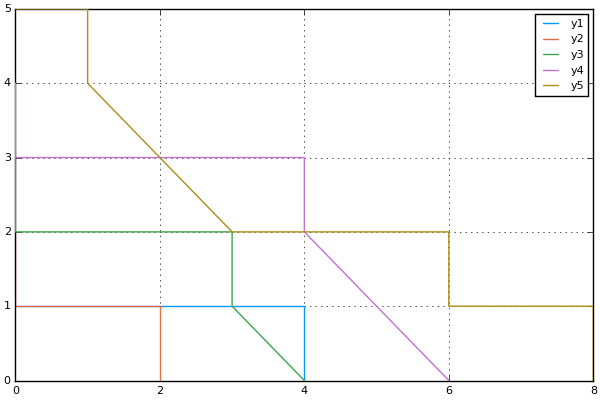

In [62]:
p = plot(Decay5[1])
for i in 2:length(Decay5)
    plot!(Decay5[i])
    #yaxis!("YLABEL",:log10)
end
p

In [64]:
# Para una cierta probabilidad P usando la función rand para N partículas sin cero
function DecaimientoNs0(N, p::Float64)
    
    #N = 1 # 1 partícula
    
    t0 = 0 # Tiempo inicial
    #ΔN = 0 #
    ts = [t0] # Arreglo de tiempos
    Ns = [N] # Arreglo de valores de N en el tiempo
    
    while N > 0
        num_aleat = rand() # Genera un número aleatorio entre 0 y 1
        
        #@show num_aleat
        
        if num_aleat > p
            N = N
            
        else
            N -= 1
            
        end

        
        
        t0 += 1
        push!(ts, t0)
        push!(Ns, N)
            
    end
    
    pop!(ts)
    pop!(Ns)

    return ts, Ns
end

DecaimientoNs0 (generic function with 1 method)

In [66]:
# Lista sí
function list_decaimiento0(N)
    Decaimientos = []
    Tiempos = []
    for i in 1:N
        dec = DecaimientoNs0(i, 1/2)
        push!(Decaimientos, dec)
        #push!(Tiempos, tiempos)
        #@show i, dec, Decaimientos
    end
    return Decaimientos
end

list_decaimiento0 (generic function with 1 method)

In [69]:
Decay4 = list_decaimiento0(10)

10-element Array{Any,1}:
 ([0,1,2],[1,1,1])                                                                          
 ([0,1,2,3],[2,1,1,1])                                                                      
 ([0,1,2],[3,2,1])                                                                          
 ([0,1,2,3,4,5,6,7,8],[4,4,3,3,3,3,3,2,1])                                                  
 ([0,1,2,3,4,5,6,7,8,9,10,11,12,13],[5,4,4,4,4,4,3,3,2,2,1,1,1,1])                          
 ([0,1,2,3,4,5,6,7],[6,6,6,5,4,3,2,1])                                                      
 ([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],[7,7,6,6,6,6,5,5,5,4,4,4,3,3,2,2,1,1,1]) 
 ([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],[8,8,8,8,7,7,6,6,5,4,3,3,3,3,3,2,1,1])      
 ([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],[9,9,9,8,8,7,7,7,6,5,4,4,4,4,4,3,2,1])      
 ([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],[10,9,9,8,7,7,7,7,6,6,5,5,4,4,4,3,2,2,1])


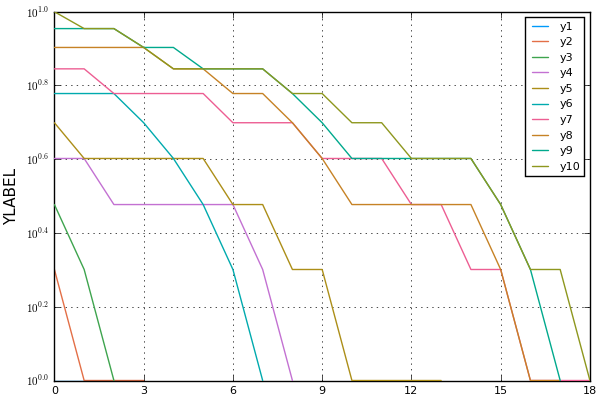

In [70]:
p = plot(Decay4[1])
for i in 2:length(Decay4)
    plot!(Decay4[i])
    yaxis!("YLABEL",:log10)
end
p

In [93]:
#Función con el for gigante
function DecaimientoNN(N, p::Float64)
    
    t0 = 0 # Tiempo inicial
    ts = [t0] # Arreglo de tiempos
    Ns = [N] # Arreglo de valores de N en el tiempo
    
    while N > 0
        
        for j in 1:N
            
            num_aleat = rand() # Genera un número aleatorio entre 0 y 1
        
        #@show num_aleat
        
            if num_aleat > p
                N = N
            
            else
                N -= 1
            
            end
        
        end
        t0 += 1
        push!(ts, t0)
        push!(Ns, N)
            
    end
    
    pop!(ts)
    pop!(Ns)

    return ts, Ns
end

DecaimientoNN (generic function with 1 method)

In [94]:
function list_decaimientoNN0(N)
    Decaimientos = []
    Tiempos = []
    for i in 1:N
        dec = DecaimientoNN(i, 1/2)
        push!(Decaimientos, dec)
        #push!(Tiempos, tiempos)
        #@show i, dec, Decaimientos
    end
    return Decaimientos
end

list_decaimientoNN0 (generic function with 1 method)

In [95]:
DecaimientoNN(5, 0.5)

([0,1,2,3,4],[5,3,3,1,1])

In [96]:
prueba1=list_decaimientoNN0(20);


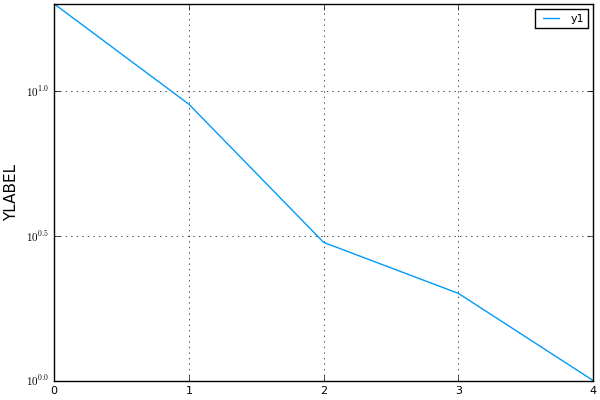

In [97]:
p = plot(prueba1[20])
#for i in 2:length(prueba1)
#    plot!(prueba1[i])
    yaxis!("YLABEL",:log10)
#end
p


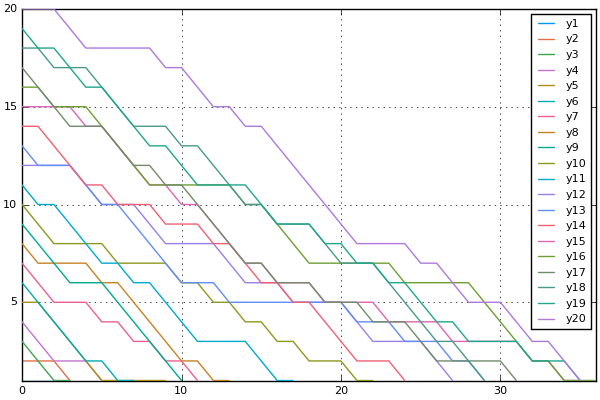

In [83]:
p = plot(prueba1[1])
for i in 2:length(prueba1)
    plot!(prueba1[i])
    #yaxis!("YLABEL",:log10)
end
p

In [98]:
pr1, n1 = DecaimientoNN(1000, 0.5)

([0,1,2,3,4,5,6,7,8,9,10],[1000,505,263,119,52,26,13,8,6,3,1])


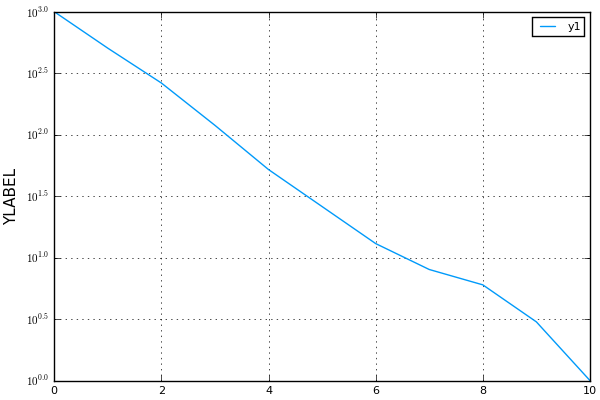

In [99]:
plot(pr1, n1)
yaxis!("YLABEL",:log10)


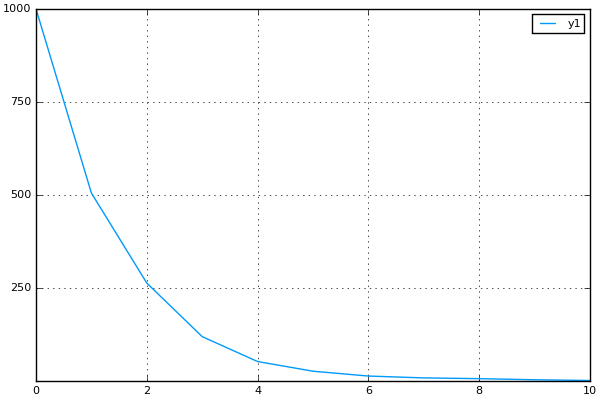

In [100]:
plot(pr1, n1)
#yaxis!("YLABEL",:log10)

In [ ]:
# Repetimos, iteramos muchas veces la función con los mismos parámetros.
# Sacamos el promedio y eso lo graficamos.
# Eso es lo que nos debería dar la exponencial?

In [ ]:
# Con manipulate, para varias probabilidades

@manipulate for p in 0:0.1:1
    ft, fn = DecaimientoN(1, p)
    plot(ft, fn, ylim=(0, 2))   
end

In [ ]:
@manipulate for p in 0:0.1:1
    ft, fn = DecaimientoN(1, p)
    scatter(ft, fn, ylim=(0, 2))   
end

#### Para N partículas

In [ ]:
# Por método de Euler

function Euler(f::Function, x0::Real, t0::Real, tf::Real, h::Real)
   
    # Condiciones iniciales
    #f = f(x0, t0)
   
     # Arreglos con condiciones iniciales
    Xs = Float64[x0]
    Ts = collect(t0:h:tf) # Arreglo que contiene los tiempos
    
    for i in 1:length(Ts)-1
    
        x = h * f(Xs[i], Ts[i]) + Xs[i]
        push!(Xs, x)

    end
    
    return Ts, Xs
    
end

In [ ]:
f(N,t) = -λ * N
λ = 0.3e6

In [ ]:
Euler(f, 1, 0, 10, 0.2)

In [ ]:
# Decaimiento Discreto
function Decaimiento(N, λ)
    t0 = 0 #tiempo inicial 0
    while N > 0
        ΔN = 0
        for i in 1:N
            if ( r _ i < lambda ) DeltaN = DeltaN + 1
    end f o r
    t = t +1
    N = N− DeltaN
    Output t , DeltaN , N
end

In [ ]:
s = @manipulate for i in 1:10
    i^2
end

In [ ]:

map(x->2x, s) 

In [ ]:
xx = -3:0.1:3

@manipulate for i in 1:10
    plot(xx, sin.(xx) .+ i, ylim=(0, 10))   # sin.(xx) actúa elemento por elemento
end